# TRMM

The dataset used in this notebook is TRMM with daily values (from NASA). The data comes in separate files for each day and thus needs to be concatenated before processing.

Using the filter available on https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207, the relevant geographical area can be extracted and the daily files downloaded. For the area, paste **5.125,62.375,39.875,97.125** to extract the exact spatial region used in the V. Stolbovas PhD thesis. For the variables, check only **precipitation** and subset the dataset.

If logged in with the earthdata account, the dataset can then be downloaded. Login can be found at https://urs.earthdata.nasa.gov/.

**Resources**

- Official TRMM README
- https://disc.gsfc.nasa.gov/datasets/TRMM_3B42_Daily_7/summary
- https://disc.gsfc.nasa.gov/SSW/#keywords=TRMM_3B42_Daily%207
- https://disc2.gesdisc.eosdis.nasa.gov/opendap/TRMM_L3/TRMM_3B42_Daily.7/
- https://disc.gsfc.nasa.gov/SSW/SSW_URL_List_Downloading_Instructions.html
- https://wiki.earthdata.nasa.gov/display/HDD/Wget+with+URS+Authentication#WgetwithURSAuthentication-Step-by-stepguide

**Citation**

Goddard Earth Sciences Data and Information Services Center(2016), TRMM (TMPA) Precipitation L3 1 day 0.25 degree x 0.25 degree V7, , Goddard Earth Sciences Data and Information Services Center (GES DISC), Accessed [21.08.2017] https://disc.gsfc.nasa.gov/datacollection/TRMM_3B42_Daily_7.html


61.75,4.5,97.75,40.5
- https://giovanni.gsfc.nasa.gov/giovanni/#service=TmAvMp&starttime=1997-12-31T00:00:00Z&endtime=2017-09-29T23:59:59Z&bbox=61.75,4.5,97.75,40.5&data=TRMM_3B42_Daily_7_precipitation&dataKeyword=trmm
- https://disc.sci.gsfc.nasa.gov/datasets?page=1&keywords=TRMM%203B42&start=1920-01-01&end=2016-06-27
- https://disc.sci.gsfc.nasa.gov/data-access

## Dependencies

To get all the dependencies needed for this project, import the corresponding conda environment file:
- **conda-gpu.env** for Tensorflow with GPU support
- **conda.env** for Tensorflow without GPU support

In [2]:
# statistical libraries
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

# visualization libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly
import plotly.plotly as py
from plotly.graph_objs import Scatter, Layout

# import own library functionality
import paths
from TRMM import TRMM
from Visualization import Visualization

# force autoreload of external modules on save
%load_ext autoreload
%autoreload 2
%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)

## Load the dataset

In [3]:
# how many years to load data for
# cannot yet use 2017 as the data for december is not complete
# TODO: extend with 2018 as soon as data is available
YEARS = range(1998, 2017)

# pre-monsoon period
MAM = [3, 4, 5]

# monsoon period
JJAS = [6, 7, 8, 9]

# post-monsoon period
OND = [10, 11, 12]

# run the aggregation algorithm over the dataframes?
# the resulting dataframe would be exorbitantly big otherwise
AGGREGATION_RESOLUTION = 6.125

In [4]:
# load data for the pre-monsoon period (MAM)

mam_df = TRMM.load_dataset(
    YEARS,
    MAM,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


In [5]:
# load data for the monsoon period (JJAS)

jjas_df = TRMM.load_dataset(
    YEARS,
    JJAS,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


In [6]:
# load data for the post-monsoon period (OND)

ond_df = TRMM.load_dataset(
    YEARS,
    OND,
    aggregation_resolution=AGGREGATION_RESOLUTION,
    timestamp=True,
    invalidate=False,
    lon_slice=slice(61.125, 97.625),
    lat_slice=slice(4.125, 40.625),
    version='v3')

> Loading from cache...


## Exploratory data analysis for the pre-monsoon period (MAM)

In [84]:
mam_df.describe()

,888710400,888796800,888883200,888969600,889056000,889142400,889228800,889315200,889401600,889488000,...,1463875200,1463961600,1464048000,1464134400,1464220800,1464307200,1464393600,1464480000,1464566400,1464652800
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,116.878213,365.207750,379.986171,223.034754,137.399152,128.646114,138.811467,46.915221,35.597474,47.213127,...,1829.423567,2605.487301,2549.269329,1571.344025,1309.510097,1539.575055,1797.089116,1492.992051,1777.423812,1759.267801
std,212.423315,636.622774,773.977799,387.053547,261.345994,246.190034,470.667817,101.190494,73.692612,171.071860,...,4282.514786,6093.719571,5404.042410,3631.008030,3089.172011,3014.436489,3338.314953,2507.204041,3000.985394,2797.044513
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.768157,0.836728,0.000000,0.000000,3.279834
25%,2.771529,1.954551,6.588272,9.739867,0.639189,0.462098,0.771988,0.408408,0.294855,0.081792,...,23.519852,16.404035,85.842702,51.917572,24.451534,38.260880,60.213954,142.214235,71.763757,54.491434
50%,17.837055,49.058740,51.516738,49.301846,12.981588,6.354931,4.415933,3.066573,5.239846,1.577568,...,330.223105,321.162173,375.216841,441.355963,298.681436,288.442887,516.763176,368.977819,455.124603,341.590896
75%,68.851433,409.667960,367.595773,315.403374,152.602941,82.889185,54.544197,29.107390,33.795132,7.507000,...,1001.933796,1735.856827,1576.889777,1167.006696,872.831433,1042.341466,1923.060025,1774.934703,2709.999508,2957.371540
max,835.956547,2332.359007,4244.255697,1706.765943,1089.483547,965.044956,2746.262117,455.546160,358.537478,998.334887,...,21532.975573,28766.630000,27503.346000,20714.916108,13608.919213,11626.525791,14311.476304,12039.356229,13268.866574,11564.658547


In [8]:
mam_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (7.0625, 64.0625) to (37.6875, 94.6875)
Columns: 1748 entries, 888710400 to 1464652800
dtypes: float64(1748)
memory usage: 491.9 KB


In [85]:
mam_df.tail()

888710400   888796800   888883200   888969600   \
latitude longitude                                                   
37.6875  70.1875    458.772750  575.980570  205.626405    0.000000   
         76.3125     21.042933  418.478688  241.418161   46.118961   
         82.4375      0.000000   61.117254   25.284489   31.475115   
         88.5625      8.065126    0.000000  144.385255  121.440225   
         94.6875     21.843227    0.796813  243.452351   16.284473   

                    889056000   889142400   889228800   889315200   \
latitude longitude                                                   
37.6875  70.1875     12.193176    5.749862    1.315137    0.219576   
         76.3125     16.478375    1.150115    0.780817    0.081783   
         82.4375      0.747494    0.470616    1.997760    0.000000   
         88.5625     11.468577   78.393587   13.107955    5.261607   
         94.6875      6.686098  356.169390  152.266848   20.385167   

                    889401600   889488000      ...       1463875200  \
latitude longitude                             ...                    
37.6875  70.1875      8.520209    2.547738     ...      1649.519181   
         76.3125      1.301924    0.451418     ...       246.189579   
         82.4375      0.000000    0.000000     ...         0.000000   
         88.5625      0.012000    0.000000     ...         7.477931   
         94.6875      0.224694    0.089056     ...        44.608456   

                    1463961600  1464048000  1464134400  1464220800  \
latitude longitude                                                   
37.6875  70.1875    555.025317  257.336322  340.671940  857.215959   
         76.3125    458.195139  245.566714   42.160292   85.406250   
         82.4375     23.312556  108.382498    1.402175    1.941066   
         88.5625      4.846568    9.752093    5.164553   16.451553   
         94.6875     24.848522  397.361654   35.981208   17.818591   

                    1464307200  1464393600  1464480000  1464566400  1464652800  
latitude longitude                                                              
37.6875  70.1875    702.358254  483.350092  316.420683  207.089979  498.307164  
         76.3125    244.001427  298.648069  194.341414   85.771531   47.129332  
         82.4375     68.325821   40.134485  133.976950  649.298298    3.279834  
         88.5625     14.727580   36.026530  152.682379  219.549362   92.083491  
         94.6875     36.059779   64.279462  238.049697  437.427868  847.221113  

[5 rows x 1748 columns]

In [10]:
mam_df[1464134400].unstack()

longitude,64.0625,70.1875,76.3125,82.4375,88.5625,94.6875
latitude,,,,,,
7.0625,1132.649975,1146.209974,4337.821436,572.636252,55.169998,5234.708806
13.1875,594.479987,1229.396862,551.950188,119.170844,542.039986,20714.916108
19.3125,2963.159940,4.863371,71.595277,269.592653,2754.596026,6294.471470
25.4375,0.000000,0.582000,720.681989,1031.015269,2766.922496,1947.885031
31.5625,25.740656,20.061924,113.427365,194.317234,63.939517,565.576742
37.6875,103.425368,340.671940,42.160292,1.402175,5.164553,35.981208


In [11]:
mam_df.iloc[0].quantile(0.9)

5088.482865239306

## Exploratory Data Analysis for the Monsoon Period (JJAS)

In [12]:
jjas_df.describe()

,896659200,896745600,896832000,896918400,897004800,897091200,897177600,897264000,897350400,897436800,...,1474416000,1474502400,1474588800,1474675200,1474761600,1474848000,1474934400,1475020800,1475107200,1475193600
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,5433.668034,4399.223758,2700.522135,1997.011973,2972.363737,3974.856781,2570.624594,2786.285018,5212.282270,3877.449051,...,3224.544339,2794.167014,2369.625356,2388.690809,2005.827472,1393.871184,1673.136462,1775.573382,1974.968263,1728.410785
std,10270.222207,7901.054769,4161.105684,3246.139163,5498.987556,9700.454374,5322.368222,5536.011669,11158.693857,6000.468861,...,3588.851083,3932.503496,3894.525284,3523.780063,3504.376671,2502.516150,2562.482258,3328.906541,4253.691655,3322.668162
min,0.450000,1.710000,0.030000,0.093535,0.000000,0.210000,0.810000,1.821435,1.672181,0.320653,...,0.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.660308,341.636031,79.755126,208.965626,79.948974,70.777994,168.499927,107.501837,206.491315,252.639240,...,223.941819,98.164587,48.075715,70.469660,42.501127,8.234251,36.960435,42.058250,57.804813,28.577258
50%,1086.314894,1678.073279,1029.611587,558.930731,418.091328,445.934642,379.390525,424.829987,647.825786,917.940441,...,1963.327610,1070.028210,849.109093,675.829781,388.071884,207.260623,184.267728,194.811707,173.847307,131.244277
75%,4639.645018,4556.187646,3362.412820,2051.696890,3907.652633,2514.528354,1445.878782,1580.498384,2964.365765,5898.143274,...,6222.628643,3890.649202,2561.018819,2776.033814,1693.220560,1903.142753,2103.744764,2194.360026,1394.076557,1426.328037
max,48795.356117,44260.258886,19476.705184,15865.171237,29510.195907,44933.609252,24050.279551,22943.250333,52125.612088,27844.349265,...,12260.327039,16149.929339,18832.778112,12489.363130,14317.241622,12755.184069,8529.083147,17098.476408,20462.369492,15208.769694


In [13]:
jjas_df.tail()

896659200    896745600    896832000    896918400   \
latitude longitude                                                       
37.6875  70.1875    1371.194421  2975.841603  1116.071684   211.039508   
         76.3125    1384.676276  1346.860401  3303.409674   705.592009   
         82.4375     933.083573   344.682745  1228.118678   262.073005   
         88.5625    1300.425922   891.558125   487.556889  1970.887084   
         94.6875     692.048885  2042.561782    83.674193  1361.432934   

                     897004800   897091200   897177600   897264000   \
latitude longitude                                                    
37.6875  70.1875     783.235803  492.909306  511.470170  188.344951   
         76.3125     213.740760  438.030256  215.596904   50.488567   
         82.4375      14.369443    4.653765  207.663612  108.029121   
         88.5625     216.650364   71.437439  178.582845  663.121499   
         94.6875    1620.853963  192.714567  226.241002  266.357730   

                     897350400    897436800      ...       1474416000  \
latitude longitude                               ...                    
37.6875  70.1875     458.680174  1876.545929     ...       208.707298   
         76.3125     129.861695   330.414105     ...      2350.245256   
         82.4375       4.300962   117.623697     ...       386.293275   
         88.5625     325.436044   234.261189     ...        22.180838   
         94.6875    1217.800126   654.513273     ...       288.425101   

                     1474502400   1474588800  1474675200  1474761600  \
latitude longitude                                                     
37.6875  70.1875      14.878522    44.432863   44.207564   32.296381   
         76.3125      98.466117   359.130121  325.462159   48.587585   
         82.4375    1168.663057    26.135782  363.154777  331.246235   
         88.5625    2818.180781   224.573763  233.015828  303.822525   
         94.6875    3156.656078  1275.128186  258.550766  358.462493   

                    1474848000  1474934400  1475020800  1475107200  1475193600  
latitude longitude                                                              
37.6875  70.1875     36.797895   37.876697   45.606837   58.032180   87.962997  
         76.3125     38.862263   42.138470  346.169526   10.359243    8.549949  
         82.4375     73.460725   34.211651   21.484244  110.142273    5.120139  
         88.5625     23.985373  105.664249   16.637036   14.679259   60.465377  
         94.6875    120.067470   50.806359  262.054142  284.940421   77.581238  

[5 rows x 2318 columns]

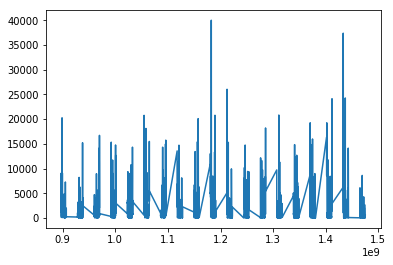

In [14]:
jjas_df.iloc[0].plot()

In [15]:
jjas_df.iloc[0].quantile(0.9)

5226.482878078148

## Exploratory Data Analysis for the Post-Monsoon Period (OND)

In [16]:
ond_df.describe()

,907200000,907286400,907372800,907459200,907545600,907632000,907718400,907804800,907891200,907977600,...,1482364800,1482451200,1482537600,1482624000,1482710400,1482796800,1482883200,1482969600,1483056000,1483142400
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2520.400011,3184.872484,2727.953624,1646.301965,1878.993250,2121.900445,2834.168529,2870.607460,3417.845042,3987.728156,...,787.804661,977.564967,567.283156,514.292159,434.401554,558.520872,398.033483,665.113830,829.020111,744.488364
std,3191.776890,4464.253629,3597.573358,2193.501143,3645.313372,3456.836165,3895.774211,3302.238394,4107.514580,5657.245721,...,3323.118516,3525.845907,1637.855118,1318.587231,990.777393,1579.240025,1082.530016,1846.637540,2562.486615,2271.075319
min,1.586143,10.459748,6.247896,1.277740,0.177654,1.000200,0.000000,0.216133,0.032412,0.324078,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,295.132195,110.675464,301.123207,55.761316,37.465873,20.543018,20.426432,37.731968,122.074824,66.478685,...,0.988500,1.252412,0.786169,0.888007,1.668476,4.153547,2.777617,0.456664,0.000000,0.724445
50%,1527.152501,1508.221127,775.449808,432.709127,181.115097,198.914166,642.480732,1465.112518,1114.081813,1110.194542,...,9.015000,8.523016,7.177040,11.609948,8.409845,21.770843,25.114041,8.476968,5.470805,7.471055
75%,3625.775336,3574.061017,4357.390297,2821.096532,1234.251862,3439.390056,4463.706901,5071.662669,6460.445459,5953.309334,...,35.108323,107.694949,87.456217,189.069022,356.572491,173.915360,202.903250,35.289630,23.417610,76.818082
max,14032.869927,19747.750222,15875.357605,8654.203119,13598.491332,13850.182534,17188.589538,10315.229741,13146.398134,21460.722849,...,19654.987660,18763.641269,7632.957467,6013.649867,4632.935823,7951.463022,6182.814892,8245.799835,13781.039744,10339.049816


In [17]:
ond_df.tail()

907200000   907286400   907372800   907459200   \
latitude longitude                                                   
37.6875  70.1875     97.016024   42.026013  335.275443   36.594665   
         76.3125     40.832763   22.965546   19.055939   23.191345   
         82.4375      1.586143   18.506041    6.247896    1.874215   
         88.5625     48.641304   53.420126  198.666501   24.130714   
         94.6875    431.288543  112.349330   47.847267   58.158422   

                    907545600   907632000   907718400   907804800   \
latitude longitude                                                   
37.6875  70.1875     47.203365   59.740783    8.168736  344.923914   
         76.3125      9.157244   13.452937    4.333451    4.539180   
         82.4375      3.575899    9.690361    1.718243    1.089684   
         88.5625     13.233235    6.515427   35.529428    6.133560   
         94.6875      7.343646   12.235386  288.533403   34.210219   

                     907891200   907977600      ...      1482364800  \
latitude longitude                              ...                   
37.6875  70.1875    2111.617031   73.306402     ...        0.000000   
         76.3125     350.200197  173.044670     ...       94.897581   
         82.4375       0.165724   68.973152     ...        0.000000   
         88.5625      15.769282   89.809826     ...        0.000000   
         94.6875       9.498710  211.195225     ...       22.919777   

                    1482451200  1482537600  1482624000   1482710400  \
latitude longitude                                                    
37.6875  70.1875      1.273936    8.099685  108.255162  4632.935823   
         76.3125    105.743267    0.000000    0.000000   301.786211   
         82.4375     70.883633    0.000000    1.214416    14.466198   
         88.5625    213.904279    0.000000    0.000000     1.299853   
         94.6875    393.047570    2.754791    0.000000     1.550493   

                    1482796800  1482883200  1482969600  1483056000  1483142400  
latitude longitude                                                              
37.6875  70.1875     16.922488  180.340899   19.889999    6.357858    0.000000  
         76.3125     42.560791    2.185793    1.202378    0.463758    0.000000  
         82.4375     90.492015  104.910446    0.081304    3.076232    1.370272  
         88.5625    253.520098   38.454263    0.828278    0.000000    0.945927  
         94.6875     42.177854  180.799190   11.904319    0.000000   65.934110  

[5 rows x 1748 columns]

In [18]:
ond_df.unstack(-1)

907200000                                                        \
longitude      64.0625      70.1875      76.3125      82.4375       88.5625   
latitude                                                                      
7.0625     2210.159930  1138.319968  1503.968423  3154.282871  11943.719694   
13.1875     124.529996   855.080705  2326.576659  4143.944964   4682.279913   
19.3125     398.009988  2766.942860  4677.581134  2912.717409    762.712315   
25.4375      28.080153  5508.312986  2430.070986  3751.669784   5301.238845   
31.5625       7.481541   296.561508  1550.336580   290.844256   1861.971056   
37.6875       1.980683    97.016024    40.832763     1.586143     48.641304   

                          907286400                                           \
longitude       94.6875      64.0625      70.1875       76.3125      82.4375   
latitude                                                                       
7.0625      6706.197685  6122.969837  3468.869929   3035.462938  1677.446279   
13.1875    14032.869927   320.879990  1738.809910   8678.355781  3889.634279   
19.3125      810.497220    50.459999  7229.207322  14225.861758  2586.854424   
25.4375      352.285069    73.496145   250.972861    592.204456  2916.940480   
31.5625     3583.810521    10.459748   105.653867   3148.831393   550.878676   
37.6875      431.288543    87.002564    42.026013     22.965546    18.506041   

              ...        1483056000                                         \
longitude     ...           76.3125      82.4375       88.5625     94.6875   
latitude      ...                                                            
7.0625        ...       2394.309554  5423.103351  13781.039744  801.914225   
13.1875       ...          6.461612     6.780000     80.099998    4.905942   
19.3125       ...          0.000000     0.000000      6.168477    6.035668   
25.4375       ...          7.476000     1.554000      2.127286    6.299737   
31.5625       ...          1.288314     0.000000      0.000000    0.057743   
37.6875       ...          0.463758     3.076232      0.000000    0.000000   

           1483142400                                                      \
longitude     64.0625     70.1875      76.3125      82.4375       88.5625   
latitude                                                                    
7.0625     297.869993  988.499967  3248.944290  8725.231326  10339.049816   
13.1875      0.000000    0.000000     7.754569    20.340000    109.469997   
19.3125      0.000000    1.590000     0.000000     0.000000      0.060000   
25.4375      0.000000    7.187541     6.354000     1.650000     34.004071   
31.5625     30.632224   17.862907     2.131708   241.503121     55.530832   
37.6875     27.263297    0.000000     0.000000     1.370272      0.945927   

                        
longitude      94.6875  
latitude                
7.0625     2391.980386  
13.1875      11.863737  
19.3125       3.893188  
25.4375       2.802373  
31.5625     159.861441  
37.6875      65.934110  

[6 rows x 10488 columns]

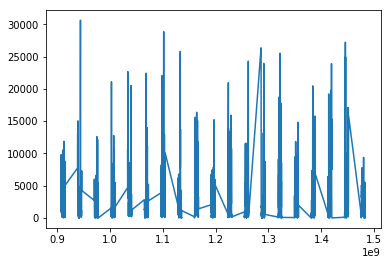

In [19]:
ond_df.iloc[0].plot()

In [20]:
ond_df.iloc[0].quantile(0.9)

8262.521814669482

## Extract Extreme Events for the Pre-Monsoon Phase (MAM)

Events are regarded as extreme events if they fall above the 90% quantile of the entire time-series.

In [7]:
# extract extreme events from the dataset
# results in a matrix of boolean values for Extreme/Non-Extreme

mam_extreme_events = TRMM.extract_extreme_events(mam_df, quantile=0.90)
mam_extreme_events.head()

0             888710400     888796800     888883200     \
latitude longitude                                                           
7.0625   64.0625            True         False         False         False   
         70.1875            True         False         False         False   
         76.3125            True         False         False         False   
         82.4375            True         False         False         False   
         88.5625            True         False         False         False   

                    888969600     889056000     889142400     889228800     \
latitude longitude                                                           
7.0625   64.0625           False         False         False         False   
         70.1875           False         False         False         False   
         76.3125           False         False         False         False   
         82.4375           False         False         False         False   
         88.5625           False         False         False         False   

                    889315200     889401600         ...       1463961600    \
latitude longitude                                  ...                      
7.0625   64.0625           False         False      ...              False   
         70.1875           False         False      ...              False   
         76.3125           False         False      ...              False   
         82.4375           False         False      ...              False   
         88.5625           False         False      ...              False   

                    1464048000    1464134400    1464220800    1464307200    \
latitude longitude                                                           
7.0625   64.0625           False         False         False         False   
         70.1875           False         False         False         False   
         76.3125            True         False         False          True   
         82.4375           False         False         False         False   
         88.5625           False         False         False         False   

                    1464393600    1464480000    1464566400    1464652800    \
latitude longitude                                                           
7.0625   64.0625           False         False         False         False   
         70.1875           False         False         False         False   
         76.3125            True         False         False         False   
         82.4375           False         False         False         False   
         88.5625           False         False         False         False   

                    999999999999  
latitude longitude                
7.0625   64.0625            True  
         70.1875            True  
         76.3125            True  
         82.4375            True  
         88.5625            True  

[5 rows x 1750 columns]

In [8]:
# print only the events that are extreme for the very first row

mam_extreme_events.iloc[0][mam_extreme_events.iloc[0]].head()

0            True
890265600    True
892598400    True
892684800    True
894412800    True
Name: (7.0625, 64.0625), dtype: bool

## Calculate Event Synchronization for the Pre-Monsoon Phase (MAM)

For each pair of grid cells, the level of synchronization in extreme events should be calculated.

In [12]:
example_list = pd.Series([True, True, True, True, True, True], index=[0, 892598400, 896140800, 926726400, 959299200, 999999999999])
for i in TRMM.sliding_window(example_list, window_size=3, padded=False):
    print(i)

[0, 892598400, 896140800]
[892598400, 896140800, 926726400]
[896140800, 926726400, 959299200]
[926726400, 959299200, 999999999999]


In [14]:
# calculate the synchronization matrix

mam_sync_matrix, mam_count_matrix, mam_split_matrix, mam_runtime = TRMM.calculate_sync_matrix(mam_extreme_events, 'MAM-0.9', invalidate=True, split=True)

> Processing...
>> 35/36
> Successfully finished in 10.601116s


In [15]:
mam_sync_matrix[0:10]

latitude             7.0625                                           \
longitude            64.0625   70.1875   76.3125   82.4375   88.5625   
latitude longitude                                                     
7.0625   64.0625    1.000000  0.497143  0.245714  0.165714  0.188571   
         70.1875    0.497143  1.000000  0.485714  0.194286  0.171429   
         76.3125    0.245714  0.485714  1.000000  0.388571  0.188571   
         82.4375    0.165714  0.194286  0.388571  1.000000  0.388571   
         88.5625    0.188571  0.171429  0.188571  0.388571  1.000000   
         94.6875    0.120000  0.102857  0.148571  0.171429  0.451429   
13.1875  64.0625    0.434286  0.451429  0.297143  0.062857  0.148571   
         70.1875    0.382857  0.508571  0.337143  0.114286  0.194286   
         76.3125    0.257143  0.371429  0.417143  0.171429  0.240000   
         82.4375    0.211429  0.280000  0.360000  0.365714  0.320000   

latitude                       13.1875                                \
longitude            94.6875   64.0625   70.1875   76.3125   82.4375   
latitude longitude                                                     
7.0625   64.0625    0.120000  0.434286  0.382857  0.257143  0.211429   
         70.1875    0.102857  0.451429  0.508571  0.371429  0.280000   
         76.3125    0.148571  0.297143  0.337143  0.417143  0.360000   
         82.4375    0.171429  0.062857  0.114286  0.171429  0.365714   
         88.5625    0.451429  0.148571  0.194286  0.240000  0.320000   
         94.6875    1.000000  0.171429  0.148571  0.177143  0.171429   
13.1875  64.0625    0.171429  1.000000  0.565714  0.354286  0.200000   
         70.1875    0.148571  0.565714  1.000000  0.520000  0.274286   
         76.3125    0.177143  0.354286  0.520000  1.000000  0.411429   
         82.4375    0.171429  0.200000  0.274286  0.411429  1.000000   

latitude              ...      31.5625                                \
longitude             ...      76.3125   82.4375   88.5625   94.6875   
latitude longitude    ...                                              
7.0625   64.0625      ...     0.160000  0.160000  0.188571  0.137143   
         70.1875      ...     0.131429  0.177143  0.222857  0.234286   
         76.3125      ...     0.142857  0.154286  0.240000  0.262857   
         82.4375      ...     0.125714  0.125714  0.188571  0.171429   
         88.5625      ...     0.108571  0.148571  0.160000  0.131429   
         94.6875      ...     0.125714  0.137143  0.142857  0.125714   
13.1875  64.0625      ...     0.102857  0.148571  0.142857  0.194286   
         70.1875      ...     0.108571  0.160000  0.188571  0.182857   
         76.3125      ...     0.120000  0.160000  0.160000  0.182857   
         82.4375      ...     0.102857  0.097143  0.182857  0.165714   

latitude             37.6875                                                    
longitude            64.0625   70.1875   76.3125   82.4375   88.5625   94.6875  
latitude longitude                                                              
7.0625   64.0625    0.080000  0.142857  0.131429  0.194286  0.211429  0.222857  
         70.1875    0.057143  0.097143  0.120000  0.205714  0.205714  0.200000  
         76.3125    0.091429  0.137143  0.108571  0.217143  0.240000  0.200000  
         82.4375    0.108571  0.142857  0.137143  0.211429  0.194286  0.165714  
         88.5625    0.108571  0.137143  0.131429  0.154286  0.165714  0.148571  
         94.6875    0.114286  0.165714  0.120000  0.154286  0.200000  0.171429  
13.1875  64.0625    0.022857  0.040000  0.097143  0.165714  0.120000  0.165714  
         70.1875    0.051429  0.080000  0.108571  0.120000  0.148571  0.200000  
         76.3125    0.057143  0.114286  0.142857  0.194286  0.205714  0.205714  
         82.4375    0.074286  0.120000  0.137143  0.200000  0.154286  0.200000  

[10 rows x 36 columns]

In [16]:
mam_count_matrix[0:10]

latitude           7.0625                                          13.1875  \
longitude          64.0625 70.1875 76.3125 82.4375 88.5625 94.6875 64.0625   
latitude longitude                                                           
7.0625   64.0625     175.0    87.0    43.0    29.0    33.0    21.0    76.0   
         70.1875      87.0   175.0    85.0    34.0    30.0    18.0    79.0   
         76.3125      43.0    85.0   175.0    68.0    33.0    26.0    52.0   
         82.4375      29.0    34.0    68.0   175.0    68.0    30.0    11.0   
         88.5625      33.0    30.0    33.0    68.0   175.0    79.0    26.0   
         94.6875      21.0    18.0    26.0    30.0    79.0   175.0    30.0   
13.1875  64.0625      76.0    79.0    52.0    11.0    26.0    30.0   175.0   
         70.1875      67.0    89.0    59.0    20.0    34.0    26.0    99.0   
         76.3125      45.0    65.0    73.0    30.0    42.0    31.0    62.0   
         82.4375      37.0    49.0    63.0    64.0    56.0    30.0    35.0   

latitude                                     ...   31.5625                  \
longitude          70.1875 76.3125 82.4375   ...   76.3125 82.4375 88.5625   
latitude longitude                           ...                             
7.0625   64.0625      67.0    45.0    37.0   ...      28.0    28.0    33.0   
         70.1875      89.0    65.0    49.0   ...      23.0    31.0    39.0   
         76.3125      59.0    73.0    63.0   ...      25.0    27.0    42.0   
         82.4375      20.0    30.0    64.0   ...      22.0    22.0    33.0   
         88.5625      34.0    42.0    56.0   ...      19.0    26.0    28.0   
         94.6875      26.0    31.0    30.0   ...      22.0    24.0    25.0   
13.1875  64.0625      99.0    62.0    35.0   ...      18.0    26.0    25.0   
         70.1875     175.0    91.0    48.0   ...      19.0    28.0    33.0   
         76.3125      91.0   175.0    72.0   ...      21.0    28.0    28.0   
         82.4375      48.0    72.0   175.0   ...      18.0    17.0    32.0   

latitude                   37.6875                                          
longitude          94.6875 64.0625 70.1875 76.3125 82.4375 88.5625 94.6875  
latitude longitude                                                          
7.0625   64.0625      24.0    14.0    25.0    23.0    34.0    37.0    39.0  
         70.1875      41.0    10.0    17.0    21.0    36.0    36.0    35.0  
         76.3125      46.0    16.0    24.0    19.0    38.0    42.0    35.0  
         82.4375      30.0    19.0    25.0    24.0    37.0    34.0    29.0  
         88.5625      23.0    19.0    24.0    23.0    27.0    29.0    26.0  
         94.6875      22.0    20.0    29.0    21.0    27.0    35.0    30.0  
13.1875  64.0625      34.0     4.0     7.0    17.0    29.0    21.0    29.0  
         70.1875      32.0     9.0    14.0    19.0    21.0    26.0    35.0  
         76.3125      32.0    10.0    20.0    25.0    34.0    36.0    36.0  
         82.4375      29.0    13.0    21.0    24.0    35.0    27.0    35.0  

[10 rows x 36 columns]

In [17]:
mam_split_matrix[0:10]

latitude           7.0625                                          13.1875  \
longitude          64.0625 70.1875 76.3125 82.4375 88.5625 94.6875 64.0625   
latitude longitude                                                           
7.0625   64.0625      87.5    42.5    20.0    13.0    16.0    10.5    39.5   
         70.1875      44.5    87.5    43.0    16.0    15.0     8.5    40.0   
         76.3125      23.0    42.0    87.5    33.0    15.5    12.0    25.5   
         82.4375      16.0    18.0    35.0    87.5    35.0    15.5     5.5   
         88.5625      17.0    15.0    17.5    33.0    87.5    39.0    13.0   
         94.6875      10.5     9.5    14.0    14.5    40.0    87.5    14.0   
13.1875  64.0625      36.5    39.0    26.5     5.5    13.0    16.0    87.5   
         70.1875      33.0    45.0    27.5     9.0    16.5    12.0    49.5   
         76.3125      25.0    32.0    39.0    15.5    21.5    15.0    31.5   
         82.4375      20.0    25.0    34.5    30.5    28.0    14.5    16.5   

latitude                                     ...   31.5625                  \
longitude          70.1875 76.3125 82.4375   ...   76.3125 82.4375 88.5625   
latitude longitude                           ...                             
7.0625   64.0625      34.0    20.0    17.0   ...      14.0    13.0    16.0   
         70.1875      44.0    33.0    24.0   ...      10.5    15.5    21.0   
         76.3125      31.5    34.0    28.5   ...       9.5    16.0    19.0   
         82.4375      11.0    14.5    33.5   ...       7.0    11.0    17.0   
         88.5625      17.5    20.5    28.0   ...       6.0    12.0    15.0   
         94.6875      14.0    16.0    15.5   ...       7.5    11.0    13.5   
13.1875  64.0625      49.5    30.5    18.5   ...       8.0    13.0    13.0   
         70.1875      87.5    45.0    23.5   ...       8.5    16.0    17.5   
         76.3125      46.0    87.5    36.5   ...       8.5    15.0    14.0   
         82.4375      24.5    35.5    87.5   ...      10.5     7.5    15.5   

latitude                   37.6875                                          
longitude          94.6875 64.0625 70.1875 76.3125 82.4375 88.5625 94.6875  
latitude longitude                                                          
7.0625   64.0625      13.0     5.5    14.5    11.5    17.5    19.0    18.5  
         70.1875      17.0     4.5     9.5    13.0    20.0    19.0    16.5  
         76.3125      21.5     7.5    12.0    10.5    19.0    22.0    16.0  
         82.4375      13.0     8.5    12.0    13.0    19.0    16.0    15.0  
         88.5625      11.5    10.0    12.0    11.5    14.0    17.5    15.0  
         94.6875      12.5     8.5    14.5     9.0    12.5    17.0    16.5  
13.1875  64.0625      17.5     1.5     4.0     9.0    15.5     9.5    15.0  
         70.1875      16.0     3.0     9.0     8.0    13.5    13.0    15.5  
         76.3125      19.0     6.0    11.5    11.5    15.0    17.0    17.0  
         82.4375      16.5     4.5     8.5    11.0    17.0    11.5    17.0  

[10 rows x 36 columns]

In [27]:
mam_sync_matrix.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (7.0625, 64.0625) to (37.6875, 94.6875)
Data columns (total 36 columns):
(7.0625, 64.0625)     36 non-null float32
(7.0625, 70.1875)     36 non-null float32
(7.0625, 76.3125)     36 non-null float32
(7.0625, 82.4375)     36 non-null float32
(7.0625, 88.5625)     36 non-null float32
(7.0625, 94.6875)     36 non-null float32
(13.1875, 64.0625)    36 non-null float32
(13.1875, 70.1875)    36 non-null float32
(13.1875, 76.3125)    36 non-null float32
(13.1875, 82.4375)    36 non-null float32
(13.1875, 88.5625)    36 non-null float32
(13.1875, 94.6875)    36 non-null float32
(19.3125, 64.0625)    36 non-null float32
(19.3125, 70.1875)    36 non-null float32
(19.3125, 76.3125)    36 non-null float32
(19.3125, 82.4375)    36 non-null float32
(19.3125, 88.5625)    36 non-null float32
(19.3125, 94.6875)    36 non-null float32
(25.4375, 64.0625)    36 non-null float32
(25.4375, 70.1875)    36 non-null float32
(25.4375, 76.3125)    36 

In [28]:
mam_count_matrix.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, (7.0625, 64.0625) to (37.6875, 94.6875)
Data columns (total 36 columns):
(7.0625, 64.0625)     36 non-null float64
(7.0625, 70.1875)     36 non-null float64
(7.0625, 76.3125)     36 non-null float64
(7.0625, 82.4375)     36 non-null float64
(7.0625, 88.5625)     36 non-null float64
(7.0625, 94.6875)     36 non-null float64
(13.1875, 64.0625)    36 non-null float64
(13.1875, 70.1875)    36 non-null float64
(13.1875, 76.3125)    36 non-null float64
(13.1875, 82.4375)    36 non-null float64
(13.1875, 88.5625)    36 non-null float64
(13.1875, 94.6875)    36 non-null float64
(19.3125, 64.0625)    36 non-null float64
(19.3125, 70.1875)    36 non-null float64
(19.3125, 76.3125)    36 non-null float64
(19.3125, 82.4375)    36 non-null float64
(19.3125, 88.5625)    36 non-null float64
(19.3125, 94.6875)    36 non-null float64
(25.4375, 64.0625)    36 non-null float64
(25.4375, 70.1875)    36 non-null float64
(25.4375, 76.3125)    36 

## Create Graph Representation for the Climate Network (MAM)

Generate a graph representation from the above count matrix. Only use data above the 95% quantile (as specified).

In [18]:
mam_graph = TRMM.generate_graph(mam_count_matrix, quantile=0.95)
mam_graph.nodes[0]

{'coordinates': (7.0625, 64.0625)}

In [21]:
mam_graph_dir = TRMM.generate_graph(mam_count_matrix, quantile=0.95, directed=True)
mam_graph_dir.nodes[0]

{'coordinates': (7.0625, 64.0625)}

In [92]:
mam_graph.edges

EdgeView([(0, 1), (1, 2), (1, 6), (1, 7), (4, 5), (6, 7), (6, 17), (7, 8), (7, 13), (11, 17), (15, 16), (15, 21), (16, 17), (18, 19), (19, 25), (20, 21), (21, 27), (22, 23), (24, 25), (24, 30), (24, 31), (25, 31), (26, 27), (27, 28), (28, 29), (30, 31), (32, 33), (33, 34), (33, 35), (34, 35)])

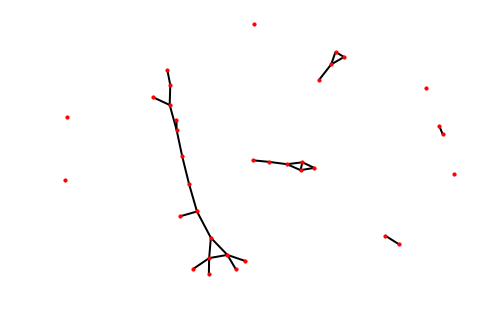

In [93]:
nx.draw(mam_graph, node_size=10, width=2)

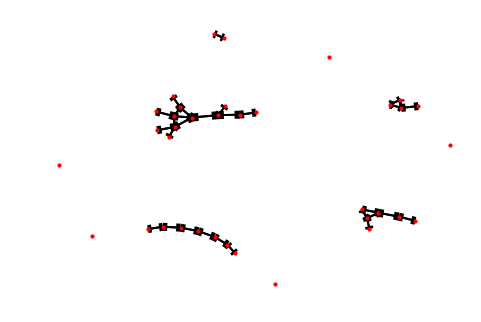

In [22]:
nx.draw(mam_graph_dir, node_size=10, width=2)

In [28]:
mam_cent_degree, mam_cent_between, _ = TRMM.calculate_centrality(mam_graph)

In [23]:
_, _, mam_pagerank = TRMM.calculate_centrality(mam_graph)

### Degree

In [95]:
mam_cent_degree.head(5)

,lat,lon,val,text,val_0to1,val_std
0,7.0625,64.0625,1,"(7.0625, 64.0625)=1.0000",0.25,-0.581519
1,7.0625,70.1875,4,"(7.0625, 70.1875)=4.0000",1.00,2.035316
2,7.0625,76.3125,1,"(7.0625, 76.3125)=1.0000",0.25,-0.581519
3,7.0625,82.4375,0,"(7.0625, 82.4375)=0.0000",0.00,-1.453797
4,7.0625,88.5625,1,"(7.0625, 88.5625)=1.0000",0.25,-0.581519


In [96]:
mam_cent_degree.pivot(index='lat', columns='lon', values='val')

lon,64.0625,70.1875,76.3125,82.4375,88.5625,94.6875
lat,,,,,,
7.0625,1,4,1,0,1,1
13.1875,3,4,1,0,0,1
19.3125,0,1,0,2,2,3
25.4375,1,2,1,3,1,1
31.5625,3,3,1,3,2,1
37.6875,2,3,1,3,2,2


### Betweenness

In [97]:
mam_cent_between.head(5)

,lat,lon,val,text,val_0to1,val_std
0,7.0625,64.0625,0.0,"(7.0625, 64.0625)=0.0000",0.000000,-0.542716
1,7.0625,70.1875,29.0,"(7.0625, 70.1875)=29.0000",0.408451,0.739175
2,7.0625,76.3125,0.0,"(7.0625, 76.3125)=0.0000",0.000000,-0.542716
3,7.0625,82.4375,0.0,"(7.0625, 82.4375)=0.0000",0.000000,-0.542716
4,7.0625,88.5625,0.0,"(7.0625, 88.5625)=0.0000",0.000000,-0.542716


In [98]:
mam_cent_between.pivot(index='lat', columns='lon', values='val')

lon,64.0625,70.1875,76.3125,82.4375,88.5625,94.6875
lat,,,,,,
7.0625,0.0,29.0,0.0,0.0,0.0,0.0
13.1875,60.0,29.0,0.0,0.0,0.0,0.0
19.3125,0.0,0.0,0.0,60.0,63.0,71.0
25.4375,0.0,4.0,0.0,59.0,0.0,0.0
31.5625,1.5,6.0,0.0,41.0,15.0,0.0
37.6875,0.0,1.5,0.0,2.0,0.0,0.0


### PageRank

In [24]:
mam_pagerank.head(5)

,lat,lon,val,text,val_0to1,val_std
0,7.0625,64.0625,0.016301,"(7.0625, 64.0625)=0.0163",2.326779e-01,-0.786325
1,7.0625,70.1875,0.054479,"(7.0625, 70.1875)=0.0545",1.000000e+00,1.829407
2,7.0625,76.3125,0.016301,"(7.0625, 76.3125)=0.0163",2.326779e-01,-0.786325
3,7.0625,82.4375,0.004724,"(7.0625, 82.4375)=0.0047",1.917624e-16,-1.579503
4,7.0625,88.5625,0.031496,"(7.0625, 88.5625)=0.0315",5.380786e-01,0.254759


In [25]:
mam_pagerank.pivot(index='lat', columns='lon', values='val')

lon,64.0625,70.1875,76.3125,82.4375,88.5625,94.6875
lat,,,,,,
7.0625,0.016301,0.054479,0.016301,0.004724,0.031496,0.031496
13.1875,0.051544,0.052184,0.015814,0.004724,0.018967,0.033512
19.3125,0.016213,0.040548,0.004724,0.020507,0.017390,0.044701
25.4375,0.033367,0.018905,0.004724,0.037137,0.020507,0.037137
31.5625,0.044376,0.030012,0.004724,0.035249,0.034686,0.035249
37.6875,0.017439,0.044876,0.017815,0.046203,0.030983,0.030983


In [100]:
mam_pagerank.pivot(index='lat', columns='lon', values='val')

lon,64.0625,70.1875,76.3125,82.4375,88.5625,94.6875
lat,,,,,,
7.0625,0.016977,0.057660,0.016977,0.004724,0.031496,0.031496
13.1875,0.041724,0.057660,0.016977,0.004724,0.004724,0.017219
19.3125,0.004724,0.016977,0.004724,0.030987,0.030388,0.044097
25.4375,0.017919,0.031047,0.018072,0.047109,0.031496,0.031496
31.5625,0.037457,0.039145,0.018579,0.048897,0.035373,0.019758
37.6875,0.025950,0.037457,0.017815,0.046203,0.030983,0.030983


## Visualize the Climate Network

### Pre-Monsoon (MAM)

In [26]:
# calculate plotly nodes for the three measures calculated above
mam_nodes_degree = Visualization.create_plot_nodes(mam_cent_degree, 'rgb(255, 0, 0)', 'Centrality')
mam_nodes_between = Visualization.create_plot_nodes(mam_cent_between, 'rgb(0, 255, 0)', 'Betweenness')
mam_nodes_pagerank = Visualization.create_plot_nodes(mam_pagerank, 'rgb(0, 0, 255)', 'PageRank')

# calculate plotly edges from the real edges of the graph
mam_edges = Visualization.create_plot_edges(mam_graph)

# customize the layout of the graph
mam_layout = Visualization.create_plot_layout('Centrality Measures (Degree, Betweenness, PageRank) in MAM')

# display the plot
fig = dict( data=[mam_nodes_degree, mam_nodes_between, mam_nodes_pagerank] + mam_edges, layout=mam_layout )
url = plotly.offline.iplot(fig)

NameError: name 'mam_cent_degree' is not defined

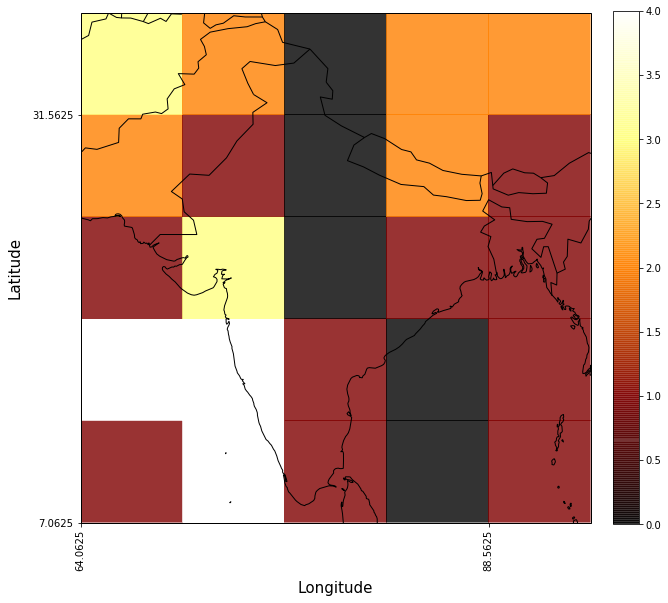

In [30]:
Visualization.create_cartopy_vis(mam_cent_degree)

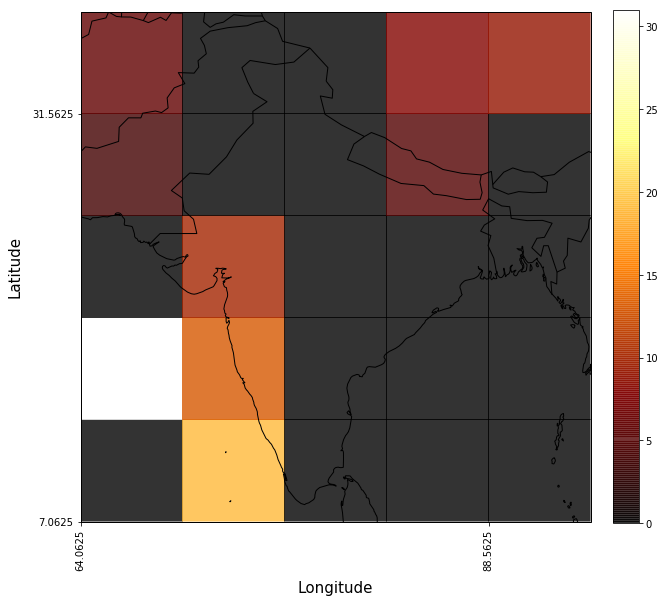

In [29]:
Visualization.create_cartopy_vis(mam_cent_between)

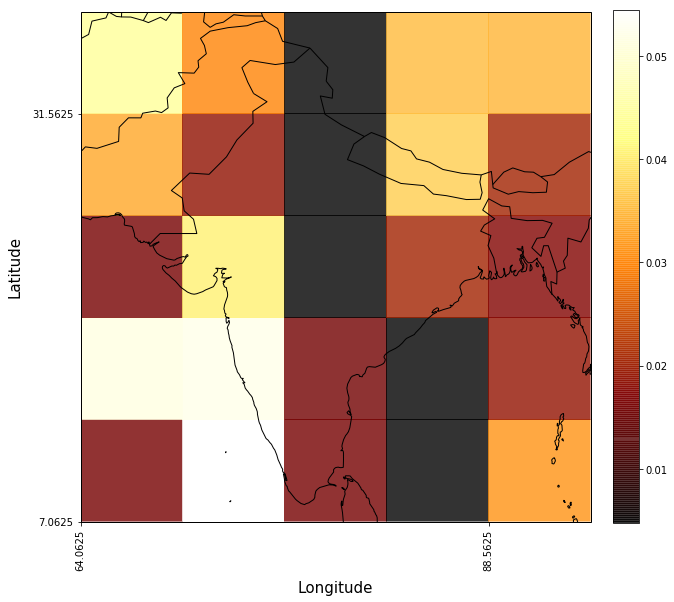

In [31]:
Visualization.create_cartopy_vis(mam_pagerank)

### Monsoon (JJAS)

In [44]:
# calculate extreme events and the sync and count matrices
jjas_extreme_events = TRMM.extract_extreme_events(jjas_df, quantile=0.9)
jjas_sync_matrix, jjas_count_matrix, jjas_runtime = TRMM.parallel_calculate_sync_matrix(jjas_extreme_events, 'JJAS-0.9')

# create a climate network graph and calculate centrality measures
jjas_graph = TRMM.generate_graph(jjas_count_matrix, quantile=0.95)
jjas_cent_degree, jjas_cent_between, jjas_pagerank = TRMM.calculate_centrality(jjas_graph)
                                                                                                                                                     
# create a plot from the above generated data
jjas_nodes_degree = Visualization.create_plot_nodes(jjas_cent_degree, 'rgb(255, 0, 0)', 'Degree')
jjas_nodes_between = Visualization.create_plot_nodes(jjas_cent_between, 'rgb(0, 255, 0)', 'Betweenness')
jjas_nodes_pagerank = Visualization.create_plot_nodes(jjas_pagerank, 'rgb(0, 0, 255)', 'PageRank')
jjas_edges = Visualization.create_plot_edges(jjas_graph)
jjas_layout = Visualization.create_plot_layout('Centrality Measures (Degree, Betweenness, PageRank) in JJAS')

# display the plot
fig = dict( data=[jjas_nodes_degree, jjas_nodes_between, jjas_nodes_pagerank] + jjas_edges, layout=jjas_layout )
url = plotly.offline.iplot(fig)

Restarting from cache...
Started all jobs...
Finished processing jobs...
Successfully saved matrices...

> Successfully finished in 6.495001s (cache: 2.552001, setup: 1515089862.037354, processing: 6.485501)


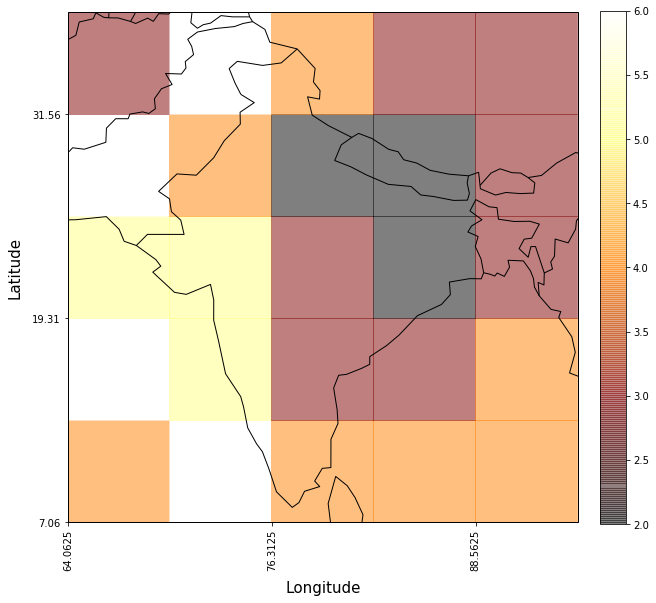

In [45]:
Visualization.create_cartopy_vis(jjas_cent_degree)

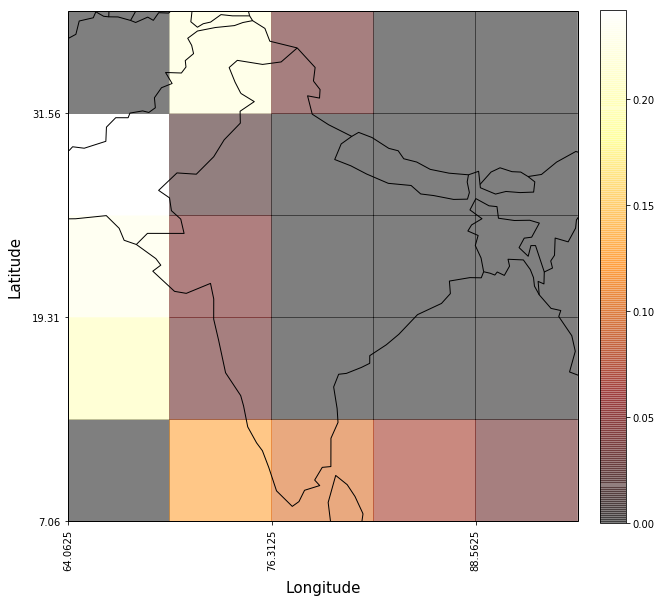

In [46]:
Visualization.create_cartopy_vis(jjas_cent_between)

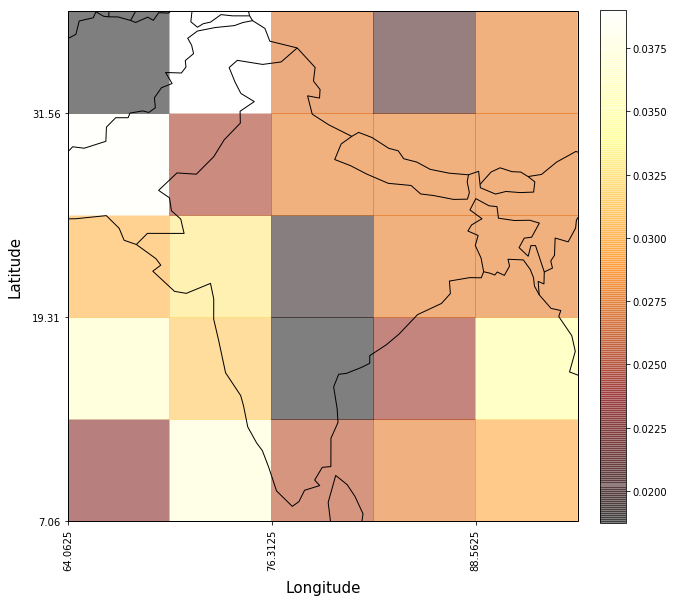

In [47]:
Visualization.create_cartopy_vis(jjas_pagerank)

### Post-Monsoon (OND)

In [48]:
# calculate extreme events and the sync and count matrices
ond_extreme_events = TRMM.extract_extreme_events(ond_df, quantile=0.9)
ond_sync_matrix, ond_count_matrix, ond_runtime = TRMM.parallel_calculate_sync_matrix(ond_extreme_events, 'OND-0.9')

# create a climate network graph and calculate centrality measures
ond_graph = TRMM.generate_graph(ond_count_matrix, quantile=0.95)
ond_cent_degree, ond_cent_between, ond_pagerank = TRMM.calculate_centrality(ond_graph)
                                                                                                                                                     
# create a plot from the above generated data
ond_nodes_degree = Visualization.create_plot_nodes(ond_cent_degree, 'rgb(255, 0, 0)', 'Degree')
ond_nodes_between = Visualization.create_plot_nodes(ond_cent_between, 'rgb(0, 255, 0)', 'Betweenness')
ond_nodes_pagerank = Visualization.create_plot_nodes(ond_pagerank, 'rgb(0, 0, 255)', 'PageRank')
ond_edges = Visualization.create_plot_edges(ond_graph)
ond_layout = Visualization.create_plot_layout('Centrality Measures (Degree, Betweenness, PageRank) in OND')

# display the plot
fig = dict( data=[ond_nodes_degree, ond_nodes_between, ond_nodes_pagerank] + ond_edges, layout=ond_layout )
url = plotly.offline.iplot(fig)

Restarting from cache...
Started all jobs...
Finished processing jobs...
Successfully saved matrices...

> Successfully finished in 5.701002s (cache: 2.055501, setup: 1515089871.338355, processing: 5.691000)


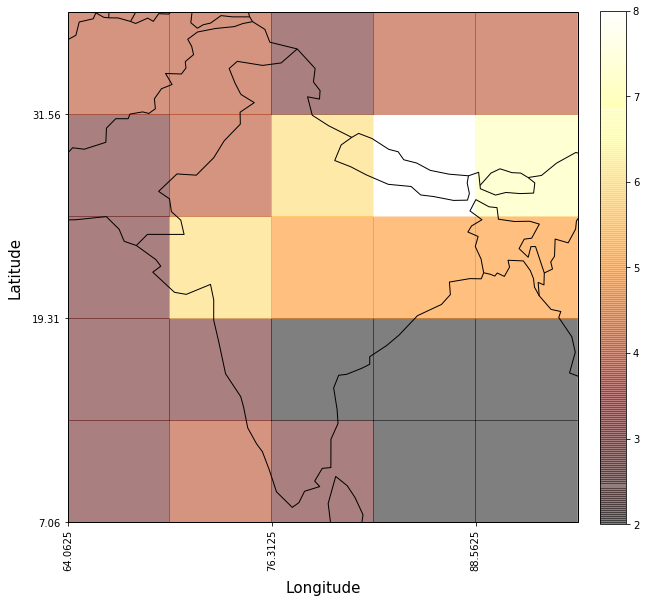

In [49]:
Visualization.create_cartopy_vis(ond_cent_degree)

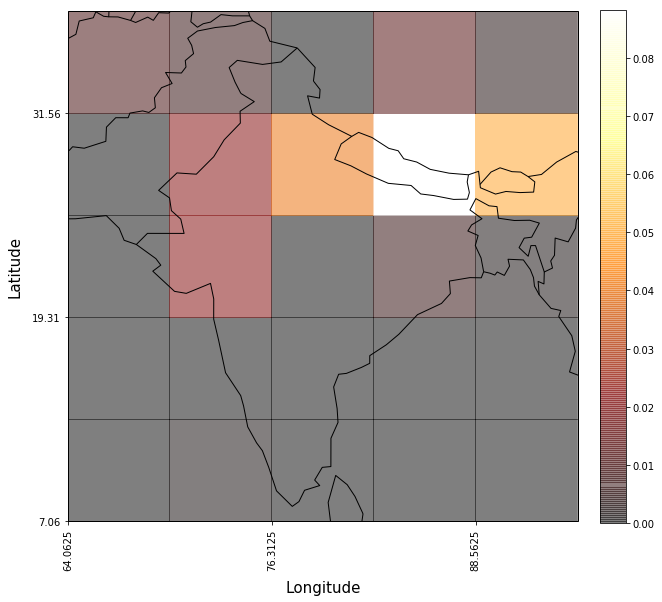

In [50]:
Visualization.create_cartopy_vis(ond_cent_between)

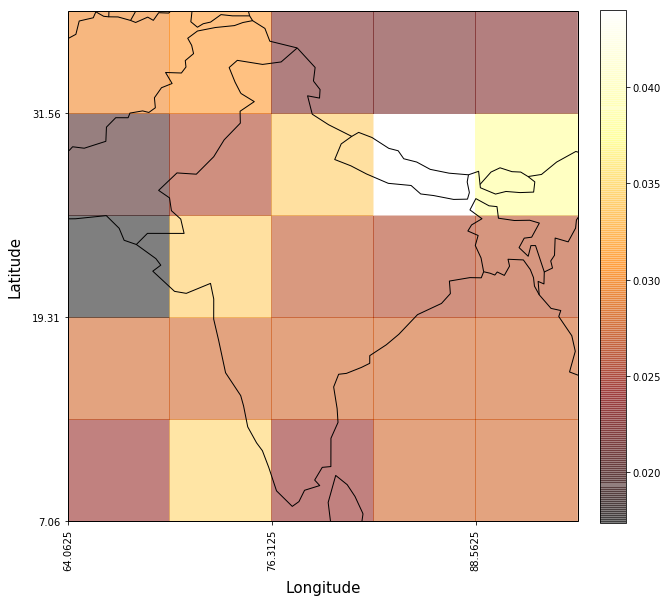

In [51]:
Visualization.create_cartopy_vis(ond_pagerank)